In [1]:
import learn2learn as l2l
from learn2learn.data import MetaDataset, TaskDataset
import sklearn.datasets as skds
import pandas as pd, torch, numpy as np
from torch.utils.data import Dataset
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [2]:
sf={'n_samples':5000,'n_classes':10,'n_features':4,'class_sep':4.0,'n_informative':4,'n_redundant':0,'n_repeated':0}
sf['n_clusters_per_class']=1
sf['k']=2
sf['shots']=50

In [3]:
X,y = skds.make_classification(n_samples=sf['n_samples'],n_classes=sf['n_classes'],
                                 class_sep=sf['class_sep'],n_features = sf['n_features'], 
                                 n_informative=sf['n_informative'],n_redundant=sf['n_redundant'],
                                 n_repeated=sf['n_repeated'],n_clusters_per_class=sf['n_clusters_per_class'])
X = X-np.min(X,axis=0)
X = X/np.max(X,axis=0)
X,y

(array([[0.28879113, 0.15444666, 0.34695741, 0.40961855],
        [0.5591749 , 0.13848571, 0.73336965, 0.33598235],
        [0.20831306, 0.18691015, 0.6494466 , 0.38804613],
        ...,
        [0.1672839 , 0.2340568 , 0.41981924, 0.27602191],
        [0.67544187, 0.20074328, 0.73862534, 0.25865165],
        [0.71724915, 0.67559933, 0.24072741, 0.84262419]]),
 array([7, 8, 6, ..., 7, 8, 4]))

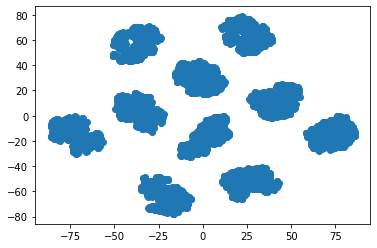

In [4]:
tsne = TSNE()
X_2d = tsne.fit_transform(X)
#colors = ['r','b','g','y','black']
#c = [colors[i] for i in list(y)]
plt.scatter(X_2d[:,0],X_2d[:,1])
plt.show()

In [4]:
class MyDS(Dataset):
    def __init__(self, X,y):
        self.samples = torch.DoubleTensor(X)
        self.labels = torch.LongTensor(y)
    def __len__(self):
        return len(self.samples)
    def __getitem__(self, idx):
        return (self.samples[idx],self.labels[idx])

In [5]:
myds = MyDS(X,y)

In [6]:
my_train = l2l.data.MetaDataset(myds)
my_tasks = l2l.data.TaskDataset(my_train, task_transforms=[
                                l2l.data.transforms.NWays(my_train, sf['k']),
                                l2l.data.transforms.KShots(my_train, 2*sf['shots']),
                                l2l.data.transforms.LoadData(my_train),
                                l2l.data.transforms.RemapLabels(my_train),
                                l2l.data.transforms.ConsecutiveLabels(my_train)
                                ],num_tasks=10)

In [7]:
data, labels = my_tasks.sample()

In [8]:
my_tasks.sample()

[tensor([[0.1660, 0.6961, 0.2267, 0.3530],
         [0.1926, 0.6662, 0.2791, 0.3193],
         [0.2291, 0.7928, 0.3521, 0.2011],
         [0.1752, 0.7611, 0.2719, 0.3332],
         [0.1686, 0.5377, 0.2252, 0.3453],
         [0.2356, 0.7749, 0.3005, 0.3198],
         [0.2829, 0.8020, 0.3074, 0.3964],
         [0.2196, 0.6823, 0.2800, 0.2981],
         [0.1418, 0.5604, 0.3076, 0.2658],
         [0.2982, 0.7187, 0.2166, 0.3695],
         [0.1294, 0.6007, 0.2345, 0.2649],
         [0.1840, 0.7971, 0.3459, 0.2928],
         [0.2841, 0.6372, 0.2891, 0.3139],
         [0.1862, 0.6174, 0.3327, 0.2665],
         [0.2377, 0.7960, 0.3169, 0.2245],
         [0.2351, 0.7762, 0.3280, 0.2483],
         [0.2699, 0.7402, 0.3251, 0.2809],
         [0.1742, 0.5543, 0.2599, 0.3229],
         [0.2731, 0.7015, 0.3443, 0.2804],
         [0.1778, 0.7094, 0.2726, 0.2668],
         [0.1957, 0.5938, 0.2873, 0.2887],
         [0.3624, 0.6902, 0.2829, 0.3441],
         [0.1808, 0.7347, 0.3239, 0.3374],
         [0

In [9]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
adaptation_indices = np.zeros(data.size(0), dtype=bool)
adaptation_indices[np.arange(sf['shots']*sf['k']) * 2] = True
evaluation_indices = torch.from_numpy(~adaptation_indices)
adaptation_indices = torch.from_numpy(adaptation_indices)
adaptation_data, adaptation_labels = data[adaptation_indices], labels[adaptation_indices]
evaluation_data, evaluation_labels = data[evaluation_indices], labels[evaluation_indices]

In [11]:
np.arange(sf['shots']*sf['k']) * 2

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198])

In [12]:
adaptation_data, adaptation_labels

(tensor([[0.2419, 0.1826, 0.3604, 0.2290],
         [0.2727, 0.1393, 0.3362, 0.2952],
         [0.1729, 0.2492, 0.3327, 0.1683],
         [0.2487, 0.1942, 0.3498, 0.4077],
         [0.2333, 0.1972, 0.3284, 0.2070],
         [0.2260, 0.2436, 0.2214, 0.2908],
         [0.3246, 0.1355, 0.1950, 0.3511],
         [0.1342, 0.3045, 0.2686, 0.2170],
         [0.2310, 0.2180, 0.2392, 0.3251],
         [0.2689, 0.1861, 0.2605, 0.3427],
         [0.2080, 0.2092, 0.3157, 0.2307],
         [0.1643, 0.2624, 0.3183, 0.2192],
         [0.2094, 0.2129, 0.2831, 0.2634],
         [0.2090, 0.2102, 0.3205, 0.3660],
         [0.2105, 0.1905, 0.3738, 0.1998],
         [0.2468, 0.2306, 0.2416, 0.2774],
         [0.1277, 0.2786, 0.3643, 0.1702],
         [0.1998, 0.2110, 0.3195, 0.2352],
         [0.1359, 0.2391, 0.4730, 0.1942],
         [0.1994, 0.2765, 0.1761, 0.2402],
         [0.2087, 0.2661, 0.1792, 0.3113],
         [0.2670, 0.1797, 0.1929, 0.2067],
         [0.2779, 0.1614, 0.3089, 0.3824],
         [0

importing Jupyter notebook from sinedata.ipynb


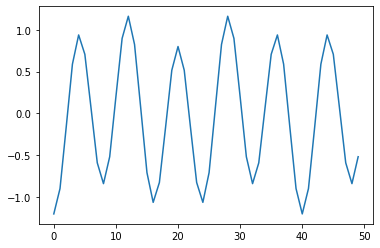

In [13]:
import import_ipynb
from sinedata import mysin, sinmix 

In [14]:
X = adaptation_data.numpy()

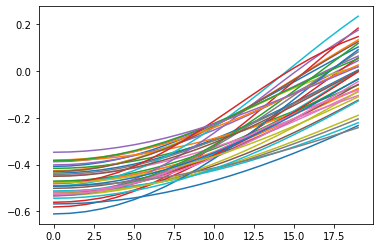

In [15]:
S = sinmix(adaptation_data,20)
for i in range(S.shape[0]):
    if i< 41: 
        plt.plot(S[i,:])
        #print(adaptation_labels[i])
plt.show()

In [17]:
import torch.nn as nn
from torch import functional as F

In [18]:
transformer_model = nn.Transformer(nhead=1, num_encoder_layers=12,d_model=1)

In [19]:
src = torch.rand((4, 1, 1))
tgt = torch.rand((1, 1, 1))
src, tgt

(tensor([[[0.7901]],
 
         [[0.6006]],
 
         [[0.3995]],
 
         [[0.0019]]]),
 tensor([[[0.9254]]]))

In [20]:
transformer_model(src,tgt)

tensor([[[0.]]], grad_fn=<NativeLayerNormBackward>)

In [21]:
rnn = nn.GRU(1, 5, 3)
lstm = nn.LSTM(1,5,3)
linear = nn.Linear(5,2)
logsoft = nn.LogSoftmax(dim=-1)
loss = nn.NLLLoss()

In [35]:
ST = torch.tensor(S).unsqueeze(-1).float()
SU = torch.transpose(ST,0,1)
SU.shape

(100, 20)

In [23]:
h = torch.rand(3,SU.shape[1],5)
H = rnn(SU,h)[1]
G=logsoft(linear(H[-1,:,:]))
G

tensor([[-0.5475, -0.8637],
        [-0.5476, -0.8635],
        [-0.5454, -0.8666],
        [-0.5475, -0.8637],
        [-0.5464, -0.8651],
        [-0.5432, -0.8696],
        [-0.5442, -0.8682],
        [-0.5420, -0.8713],
        [-0.5434, -0.8693],
        [-0.5453, -0.8667],
        [-0.5457, -0.8661],
        [-0.5446, -0.8677],
        [-0.5450, -0.8671],
        [-0.5459, -0.8658],
        [-0.5470, -0.8644],
        [-0.5446, -0.8677],
        [-0.5442, -0.8683],
        [-0.5454, -0.8665],
        [-0.5467, -0.8648],
        [-0.5418, -0.8715],
        [-0.5411, -0.8725],
        [-0.5448, -0.8674],
        [-0.5468, -0.8646],
        [-0.5446, -0.8677],
        [-0.5483, -0.8626],
        [-0.5476, -0.8636],
        [-0.5443, -0.8681],
        [-0.5462, -0.8655],
        [-0.5421, -0.8711],
        [-0.5487, -0.8620],
        [-0.5463, -0.8653],
        [-0.5465, -0.8651],
        [-0.5470, -0.8643],
        [-0.5484, -0.8624],
        [-0.5463, -0.8654],
        [-0.5454, -0

In [24]:
from models import MyGRU1

importing Jupyter notebook from models.ipynb


In [65]:
X = torch.rand(1,50,1)
mygru = MyGRU1(1,5,3,2)
mygru(X).shape

torch.Size([1, 2])

In [30]:
adaptation_labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])

In [39]:
optimizer = torch.optim.Adam(mygru.parameters(),lr=1e-3)

In [55]:
adaptation_data_sin = torch.tensor(sinmix(adaptation_data,20)).unsqueeze(-1).float()

In [69]:
torch.tensor(sinmix(adaptation_data,10)).dtype

torch.float64

In [57]:
mygru(adaptation_data_sin)

tensor([[-0.6995, -0.6868],
        [-0.6998, -0.6865],
        [-0.6983, -0.6880],
        [-0.7004, -0.6859],
        [-0.6992, -0.6871],
        [-0.6977, -0.6886],
        [-0.6981, -0.6883],
        [-0.6973, -0.6890],
        [-0.6983, -0.6880],
        [-0.6989, -0.6875],
        [-0.6990, -0.6874],
        [-0.6982, -0.6881],
        [-0.6987, -0.6876],
        [-0.6993, -0.6870],
        [-0.6993, -0.6871],
        [-0.6984, -0.6880],
        [-0.6981, -0.6882],
        [-0.6990, -0.6874],
        [-0.6990, -0.6873],
        [-0.6970, -0.6893],
        [-0.6968, -0.6895],
        [-0.6981, -0.6882],
        [-0.6998, -0.6866],
        [-0.6989, -0.6875],
        [-0.7004, -0.6859],
        [-0.6996, -0.6867],
        [-0.6985, -0.6878],
        [-0.6996, -0.6868],
        [-0.6972, -0.6891],
        [-0.7007, -0.6857],
        [-0.6997, -0.6866],
        [-0.6990, -0.6874],
        [-0.6992, -0.6871],
        [-0.6999, -0.6864],
        [-0.6989, -0.6874],
        [-0.6988, -0

In [58]:
from IPython import display
for i in range(1000):
    l = loss(mygru(adaptation_data_sin),adaptation_labels)
    print(l)
    display.clear_output(wait=True)
    l.backward()
    optimizer.step()

tensor(0.0275, grad_fn=<NllLossBackward>)


In [59]:
from sklearn.metrics import accuracy_score

In [62]:
yh_pred = mygru(adaptation_data_sin)
_, predicted = torch.max(yh_pred, 1)
adapt_accuracy = accuracy_score(adaptation_labels,predicted)
adapt_accuracy

0.99